In [1]:
# Install Packages
!pip install kaggle --upgrade --quiet
!pip install opendatasets --upgrade --quiet
!pip install librosa --upgrade --quiet
!pip install noisereduce --upgrade --quiet

In [5]:
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
import os
import sys
import csv

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import seaborn as sns
from IPython.display import Audio
import librosa
import librosa.display
import wave

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

sys.path.append('C:\Study\TechnionAI\Victor\VoiceEmotionalAnalysis')
import prjLib as lib
import VictorLib as vic

import warnings
warnings.filterwarnings ('ignore')

In [6]:
# Parameters

FRAME_LEN = 2048 # 4096
HOP_LEN = 512 # 2048
N = 128

FIGX = 14
FIGY = 2

In [6]:
sample_n, sr = librosa.load('../data/ravdess-emotional-speech-audio/Actor_01/03-01-01-01-01-01-01.wav')
display(sample_n.shape)
Audio(data=sample_n, rate=sr)

(72838,)

In [7]:
sample_f, sr = librosa.load('../data/ravdess-emotional-speech-audio/Actor_01/03-01-06-01-01-01-01.wav')
display(sample_f.shape)
Audio(data=sample_f, rate=sr)

(80931,)

In [8]:
def PlotWave(sample,sr,sample_name):
    t = np.linspace(0,sample.size/sr,sample.size)
    plt.plot(t,sample,label=sample_name,alpha=0.75)

def PlotFrames(sample,sample_name,hop_len):
    ft = librosa.frames_to_time(frames=range(len(sample)),hop_length=hop_len)
    plt.plot(ft,sample,label=sample_name,alpha=0.75)

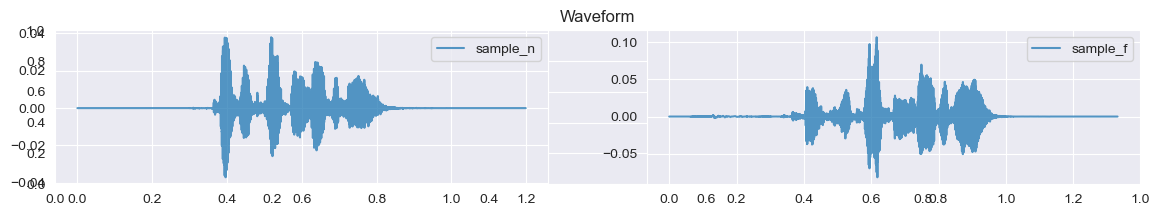

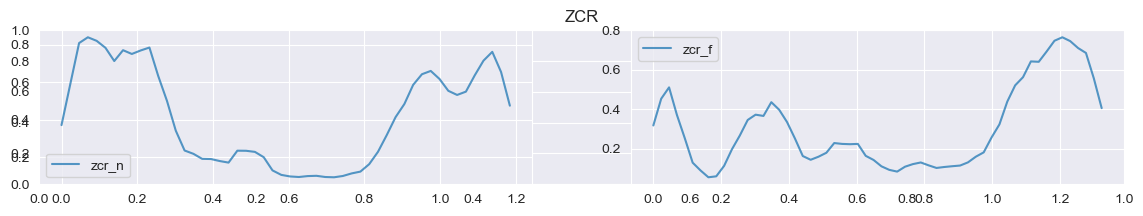

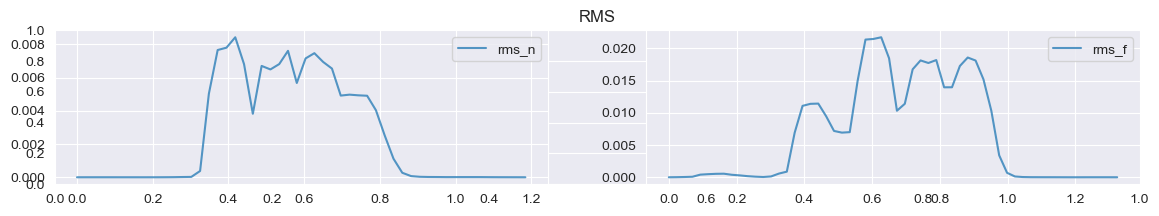

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


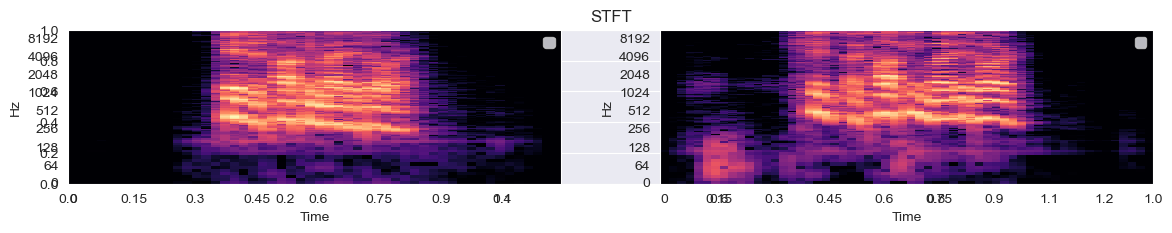

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


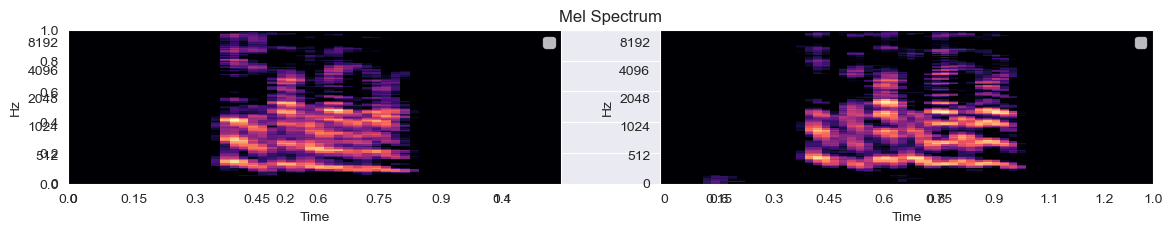

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


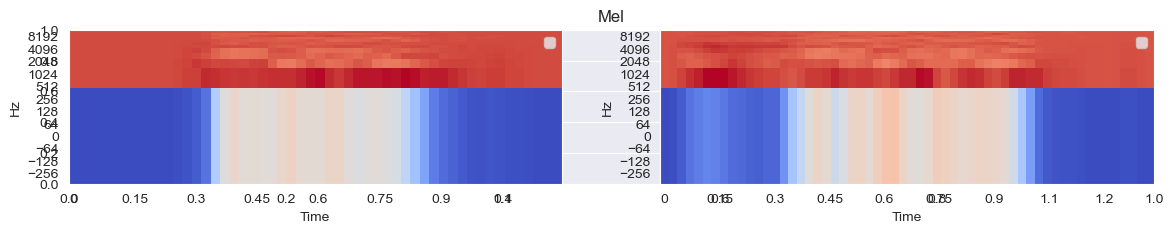

In [9]:
plt.figure(figsize=(FIGX,FIGY))
plt.title('Waveform')
ax = plt.subplot(1,2,1)
sample_n, sr = librosa.load('../data/ravdess-emotional-speech-audio/Actor_01/03-01-01-01-01-01-01.wav')
sample_n = librosa.resample(sample_n, orig_sr=sr, target_sr=8000)
PlotWave(sample_n,sr,'sample_n')
plt.legend()
ax = plt.subplot(1,2,2)
sample_f, sr = librosa.load('../data/ravdess-emotional-speech-audio/Actor_01/03-01-06-01-01-01-01.wav')
sample_f = librosa.resample(sample_f, orig_sr=sr, target_sr=8000)
PlotWave(sample_f,sr,'sample_f')
plt.legend()
plt.show()

plt.figure(figsize=(FIGX,FIGY))
plt.title('ZCR')
ax = plt.subplot(1,2,1)
PlotFrames(librosa.feature.zero_crossing_rate(y=sample_n,frame_length=FRAME_LEN,hop_length=HOP_LEN).T,'zcr_n',HOP_LEN)
plt.legend()
ax = plt.subplot(1,2,2)
PlotFrames(librosa.feature.zero_crossing_rate(y=sample_f,frame_length=FRAME_LEN,hop_length=HOP_LEN).T,'zcr_f',HOP_LEN)
plt.legend()
plt.show()

plt.figure(figsize=(FIGX,FIGY))
plt.title('RMS')
ax = plt.subplot(1,2,1)
PlotFrames(librosa.feature.rms(y=sample_n,frame_length=FRAME_LEN,hop_length=HOP_LEN).T,'rms_n',HOP_LEN)
plt.legend()
ax = plt.subplot(1,2,2)
PlotFrames(librosa.feature.rms(y=sample_f,frame_length=FRAME_LEN,hop_length=HOP_LEN).T,'rms_f',HOP_LEN)
plt.legend()
plt.show()

plt.figure(figsize=(FIGX,FIGY))
plt.title('STFT')
ax = plt.subplot(1,2,1)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(y=sample_n,n_fft=FRAME_LEN,hop_length=HOP_LEN)),ref=np.max),y_axis='log',x_axis='time',ax=ax)
plt.legend()
ax = plt.subplot(1,2,2)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(y=sample_f,n_fft=FRAME_LEN,hop_length=HOP_LEN)),ref=np.max),y_axis='log',x_axis='time',ax=ax)
plt.legend()
plt.show()

plt.figure(figsize=(FIGX,FIGY))
plt.title('Mel Spectrum')
ax = plt.subplot(1,2,1)
librosa.display.specshow(librosa.amplitude_to_db(librosa.feature.melspectrogram(y=sample_n,n_fft=FRAME_LEN,hop_length=HOP_LEN,n_mels=N),ref=np.max),y_axis='mel',x_axis='time',ax=ax)
plt.legend()
ax = plt.subplot(1,2,2)
librosa.display.specshow(librosa.amplitude_to_db(librosa.feature.melspectrogram(y=sample_f,n_fft=FRAME_LEN,hop_length=HOP_LEN,n_mels=N),ref=np.max),y_axis='mel',x_axis='time',ax=ax)
plt.legend()
plt.show()

plt.figure(figsize=(FIGX,FIGY))
plt.title('Mel')
ax = plt.subplot(1,2,1)
librosa.display.specshow(librosa.feature.mfcc(y=sample_n,sr=sr,n_mfcc=13,n_fft=FRAME_LEN,hop_length=HOP_LEN), y_axis='log', x_axis='time',sr=sr)
plt.legend()
ax = plt.subplot(1,2,2)
librosa.display.specshow(librosa.feature.mfcc(y=sample_f,sr=sr,n_mfcc=13,n_fft=FRAME_LEN,hop_length=HOP_LEN), y_axis='log', x_axis='time',sr=sr)
plt.legend()
plt.show()


In [60]:
def AddWhiteNoise(signal,noise_factor):
    noise = np.random.normal(0,signal.std(),signal.size)
    signal_wn = signal + noise * noise_factor
    return signal_wn

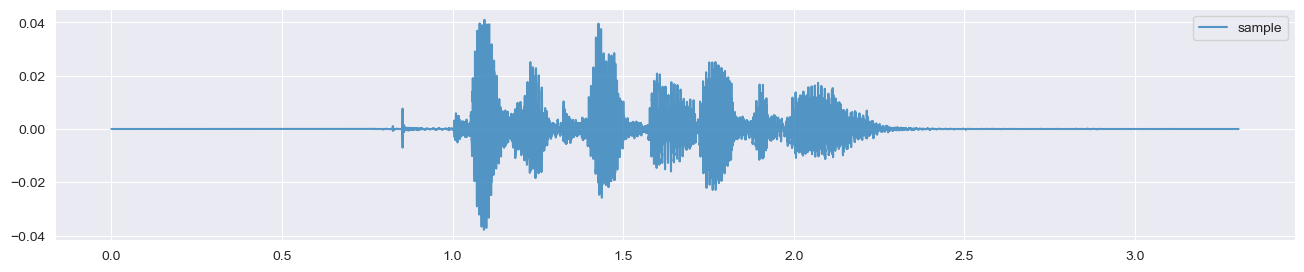

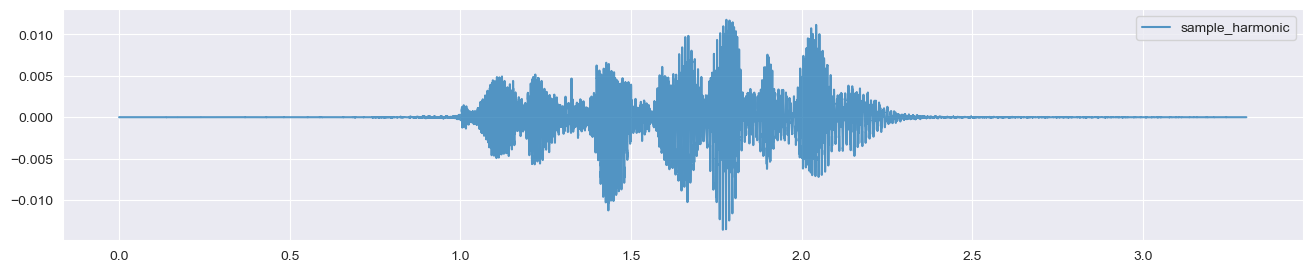

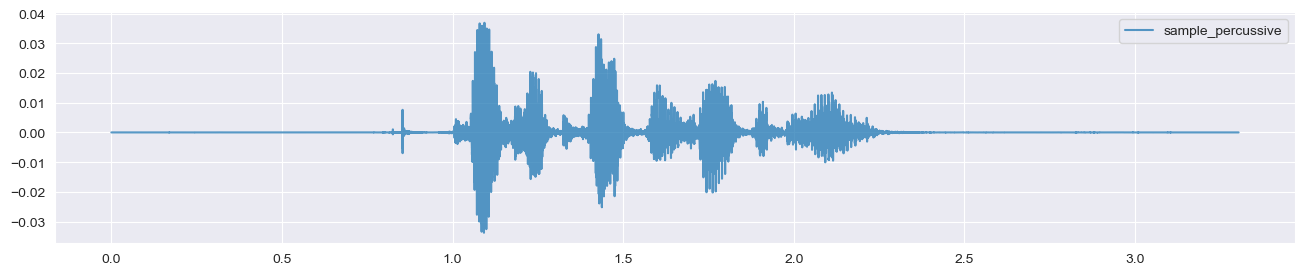

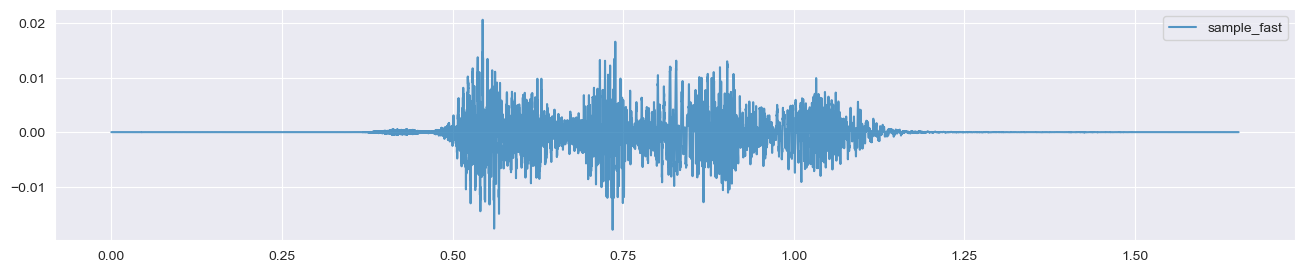

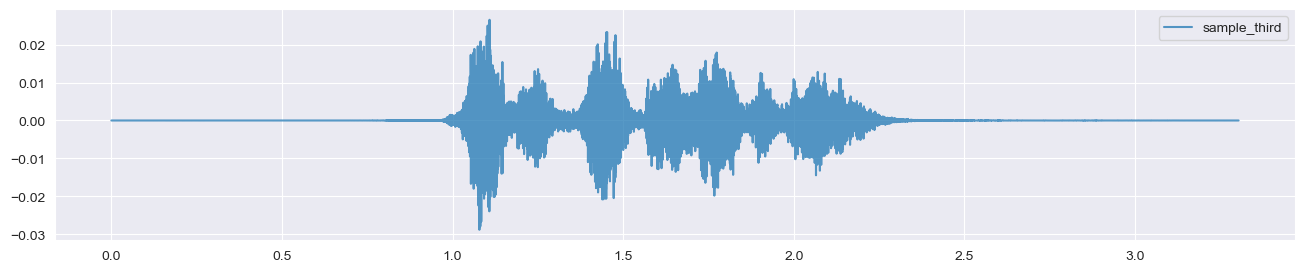

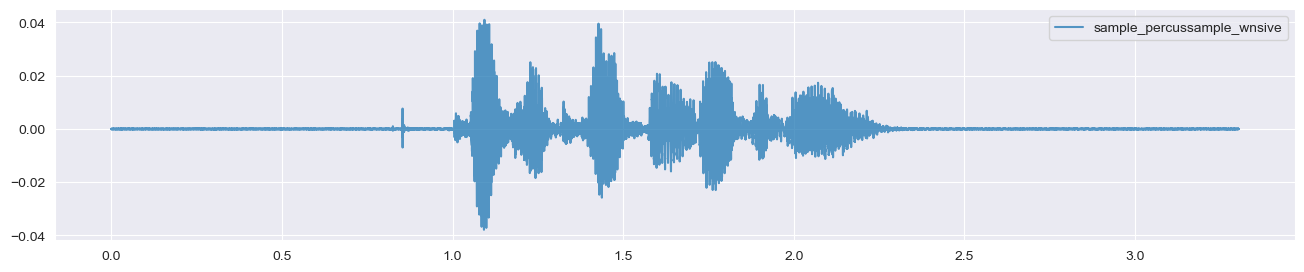

In [64]:
sample, sr = librosa.load('../data/ravdess-emotional-speech-audio/Actor_01/03-01-01-01-01-01-01.wav')
sample_harmonic = librosa.effects.harmonic(sample)
sample_percussive = librosa.effects.percussive(sample)
sample_fast = librosa.effects.time_stretch(sample, rate=2.0)
sample_third = librosa.effects.pitch_shift(sample, sr=sr, n_steps=16,bins_per_octave=12)
sample_wn = AddWhiteNoise(sample, 0.01)

plt.figure(figsize=(16,3))
PlotWave(sample,sr,'sample')
plt.legend()
plt.figure(figsize=(16,3))
PlotWave(sample_harmonic,sr,'sample_harmonic')
plt.legend()
plt.figure(figsize=(16,3))
PlotWave(sample_percussive,sr,'sample_percussive')
plt.legend()
plt.figure(figsize=(16,3))
PlotWave(sample_fast,sr,'sample_fast')
plt.legend()
plt.figure(figsize=(16,3))
PlotWave(sample_third,sr,'sample_third')
plt.legend()
plt.figure(figsize=(16,3))
PlotWave(sample_wn,sr,'sample_percussample_wnsive')
plt.legend()

In [46]:
Audio(data=sample, rate=sr)

In [47]:
Audio(data=sample_harmonic, rate=sr)

In [48]:
Audio(data=sample_percussive, rate=sr)

In [49]:
Audio(data=sample_fast, rate=sr)

In [50]:
Audio(data=sample_third, rate=sr)

In [65]:
Audio(data=sample_wn, rate=sr)